In [163]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
!pip install numerize
from numerize import numerize 



In [164]:
df_global = pd.read_csv("covid/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_global = pd.read_csv("covid/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

deaths_india = deaths_global[deaths_global['Country/Region'] == 'India']
df_india = df_global[df_global['Country/Region'] == 'India']

In [165]:
df_india.drop(['Province/State','Lat','Long'], axis=1, inplace=True)
deaths_india.drop(['Province/State','Lat','Long'], axis=1, inplace=True)

C:\Users\RAVIRAJA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [166]:
df = df_india.transpose()
df.reset_index(inplace=True)
df.columns = ['Date', 'Cases']
df.drop(0, axis = 0, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df['Cases'] = df['Cases'].astype('int64')
df.set_index('Date', inplace = True)

deaths = deaths_india.transpose()
deaths.reset_index(inplace=True)
deaths.columns = ['Date', 'Deaths']
deaths.drop(0,axis = 0, inplace = True)
deaths['Date'] = pd.to_datetime(deaths['Date'])
deaths['Deaths'] = deaths['Deaths'].astype('int64')
deaths.set_index('Date', inplace = True)

In [167]:
cases = df['Cases'].tolist()
cases_daily = []
for i in range(0, len(cases)):
    if i == 0:
        cases_daily.append(cases[i])
    else:
        today = cases[i]
        yesterday = cases[i-1]
        cases_daily.append(today-yesterday)
df['Daily_cases'] = cases_daily

death = deaths['Deaths'].tolist()
daily_deaths = []
for i in range(0, len(death)):
    if i == 0:
        daily_deaths.append(death[i])
    else:
        today = death[i]
        yesterday = death[i-1]
        daily_deaths.append(today-yesterday)
deaths['Daily_deaths'] = daily_deaths

df = pd.concat([df,deaths], axis = 1)


In [168]:
df_graph = df[['Daily_cases', 'Daily_deaths']]
group_month = df_graph.groupby(pd.Grouper(freq='M')).sum()
final = group_month[group_month.index.month < 6]
year_2020 = final[final.index.year == 2020]
year_2021 = final[final.index.year == 2021]
year_2020.index = year_2020.index.month_name()
year_2021.index = year_2021.index.month_name()
year_2021.columns = ['Daily_cases_2021','Daily_deaths_2021']
final2 = pd.concat([year_2020, year_2021], axis = 1)
final = final2[['Daily_deaths', 'Daily_deaths_2021']]
final.reset_index(inplace=True)
dd = final['Daily_deaths'].tolist()
dd21 = final['Daily_deaths_2021'].tolist()
l1 = [numerize.numerize(x,0) for x in dd]
l2 = [numerize.numerize(x,0) for x in dd21]
l1.extend(l2)
labels = l1

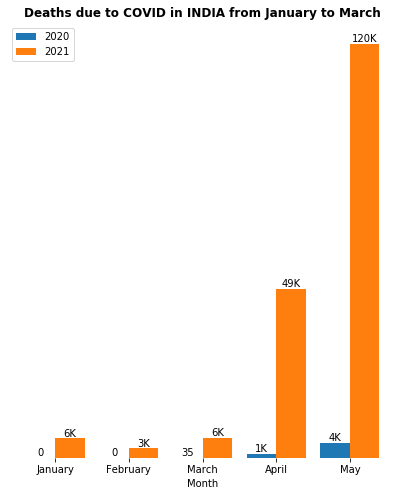

In [170]:
fig, ax = plt.subplots(figsize = (7,8))
barss = final.plot.bar(x='Date', ax=ax, width = 0.8,align = 'center')
ax.axes.yaxis.set_visible(False)
plt.xticks(final.index.values, rotation = 0)
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend(['2020', '2021'])
plt.xlabel('Month')

plt.title('Deaths due to COVID in INDIA from January to March', fontweight = 'bold')
plt.show()



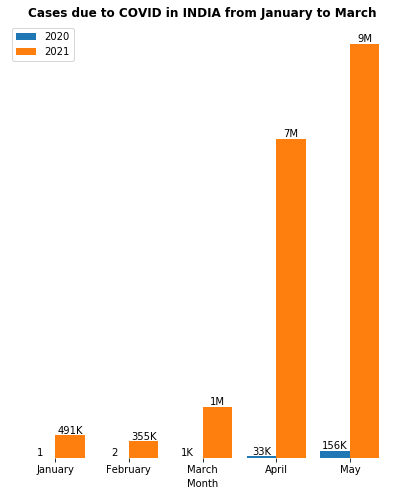

In [173]:
final = final2[['Daily_cases', 'Daily_cases_2021']]
final.reset_index(inplace=True)
dd = final['Daily_cases'].tolist()
dd21 = final['Daily_cases_2021'].tolist()
l1 = [numerize.numerize(x,0) for x in dd]
l2 = [numerize.numerize(x,0) for x in dd21]
l1.extend(l2)
labels = l1
fig, ax = plt.subplots(figsize = (7,8))
barss = final.plot.bar(x='Date', ax=ax, width = 0.8,align = 'center')
ax.axes.yaxis.set_visible(False)
plt.xticks(final.index.values, rotation = 0)
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend(['2020', '2021'])
plt.xlabel('Month')

plt.title('Cases due to COVID in INDIA from January to March', fontweight = 'bold')
plt.show()